In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.models as models
import numpy as np
import os
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
# https://github.com/Classmate-Huang/CV_ImageClassification/blob/master/ResNet/SaliencyMap.ipynb

In [2]:
#################################################################
#############change the img path and label index################
image_path = 'wheel.jpg'##
v_k ={"snake.jpg":63,"fish.jpg":393,"wheel.jpg":479,"cat.jpg":282,"dog.jpg":207}
image_label=v_k[image_path]##
#################################################################
#################################################################
label =torch.tensor([image_label,])
img=Image.open(image_path).resize((224,224))
real=np.array(img)
device = torch.device('cuda:0')
vgg16 = models.vgg16(pretrained=True,progress=True).to(device)
# [index=63]Indian cobra, Naja naja 
# index=393]anemone fish
# [index=479]car wheel
# [index=282]tiger cat
# [index=207]golden retriever

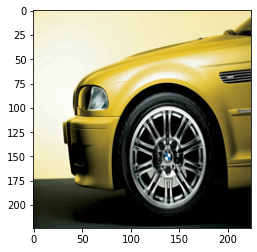

In [3]:
plt.imshow(real)
plt.savefig('./DIC_output/real.jpg')
plt.show()

In [4]:
transform = transforms.Compose([
    transforms.Resize(224),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
vgg16.eval()
img=transform(img).unsqueeze(0).to(device)
img.requires_grad_()
label = label.to(device)
saliency = None

In [5]:
logits = vgg16.forward(img)
logits = logits.gather(1, label.view(1,-1)).squeeze(0).squeeze(0) # 得到正确分类
logits.backward() 
saliency = abs(img.grad.data) 
saliency, _ = torch.max(saliency, dim=1)  # 一个pixel只取最大值
#saliency.squeeze()

In [6]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

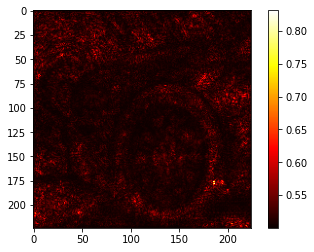

In [7]:
saliency = saliency.cpu().numpy()+0.5
plt.imshow(saliency[0], cmap=plt.cm.hot)
plt.colorbar()
plt.savefig('./DIC_output/saliency.jpg')
plt.show()